<a href="https://colab.research.google.com/github/khaterehsm/Pathrise_Project/blob/main/3_visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview and Dataset Description

This notebook analyzes a dataset containing information about individuals who participated in a program, focusing on factors that might influence their placement status. The project aims to explore various features such as education level, professional experience, job search challenges, and demographics to understand their relationship with successful placement.

## Dataset

The dataset contains information on [mention number of rows and columns from `data.shape` output] individuals with [mention number of columns from `data.info()` output] features, including:
- `pathrise_status`: The current status within the program.
- `primary_track`: The main area of focus within the program (e.g., SWE, Design, Data).
- `program_duration_days`: The duration of participation in the program.
- `placed`: A binary indicator of whether the individual was placed in a job (1 for placed, 0 for not placed).
- `employment_status`: The employment status of the individual.
- `highest_level_of_education`: The highest educational attainment.
- `length_of_job_search`: The duration of their job search.
- `biggest_challenge_in_search`: The main obstacle faced during the job search.
- `professional_experience`: The level of professional experience.
- `work_authorization_status`: The work authorization status.
- `number_of_interviews`: The count of interviews.
- `number_of_applications`: The count of job applications.
- `gender`: The gender of the individual.
- `race`: The race of the individual.
- `entrance_year`: The year they entered the program.

In [51]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn

In [52]:
# Upload the dataset from your local machine
from google.colab import files
uploaded = files.upload()

Saving filtered_data.csv to filtered_data (1).csv


In [53]:
# Read the uploaded CSV file into a pandas DataFrame and display its shape (rows, columns)
data= pd.read_csv('filtered_data.csv')
data.shape

(2311, 15)

/tmp/ipython-input-1178441290.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(data=data, x='placed', palette=['blue', 'red'], orient='v')


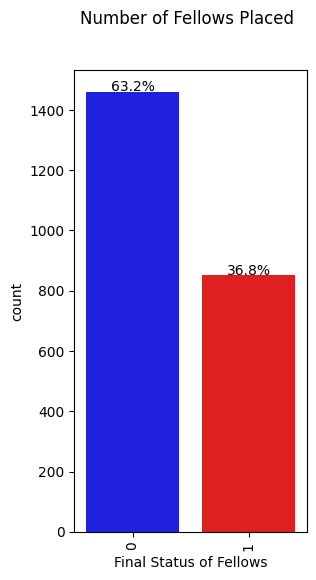

In [54]:
# Create a figure and axes for the plot
plt.figure(figsize=(3, 6))
# Set the main title of the plot
plt.suptitle('Number of Fellows Placed')
# Set the label for the x-axis
plt.xlabel('Final Status of Fellows')
# Create a countplot using seaborn to visualize the distribution of 'placed' status
# 'data' is the DataFrame, 'x' is the column for the x-axis, 'palette' sets the colors, 'orient' sets the orientation
ax= sns.countplot(data=data, x='placed', palette=['blue', 'red'], orient='v')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Calculate the total number of fellows to compute percentages
total = len(data["placed"])
# Iterate through the bars (patches) in the countplot
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    # Add text labels above each bar showing the percentage
    ax.text(p.get_x() + p.get_width() / 2., # X-coordinate of the text
            height + 3, # Y-coordinate of the text (slightly above the bar)
            f'{height/total:.1%}', # Formatted percentage string
            ha="center") # Horizontal alignment of the text

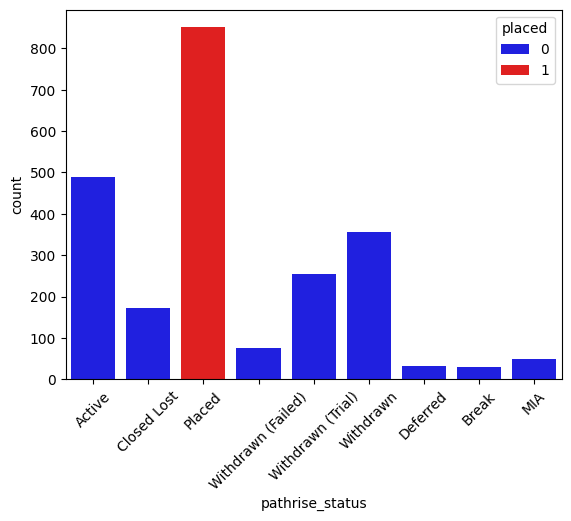

In [5]:
sns.countplot(data=data, x='pathrise_status', hue='placed', palette=['blue', 'red'])
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-257354699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y='placed', palette=['blue', 'red'])


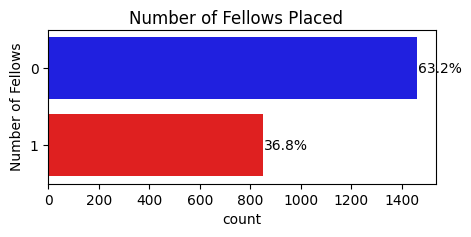

In [6]:
plt.figure(figsize=(5, 2))
plt.suptitle('Number of Fellows Placed')
plt.ylabel('Number of Fellows')
ax = sns.countplot(data=data, y='placed', palette=['blue', 'red'])
plt.xticks(rotation=0)

total = len(data["placed"])
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3,
            p.get_y() + p.get_height() / 2.,
            f'{width/total:.1%}',
            va="center")

plt.show()

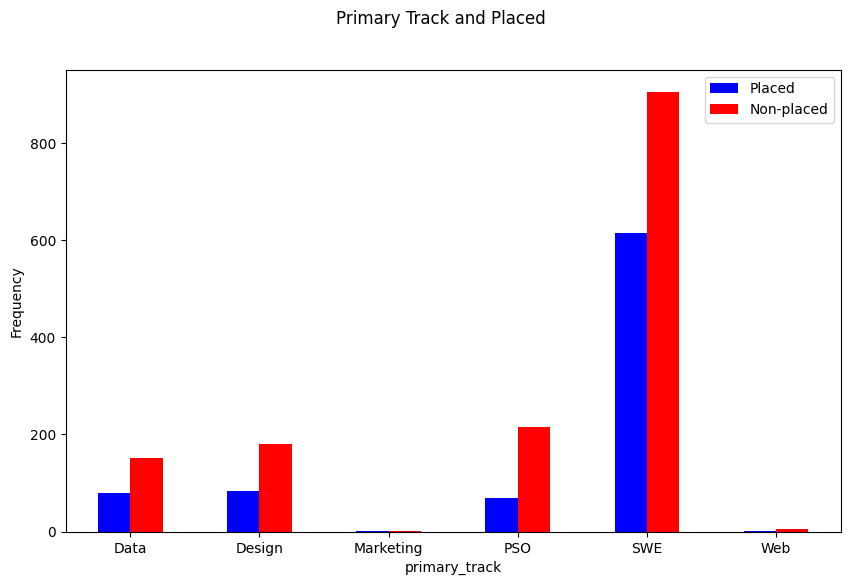

In [7]:
placed_fellows_df = data[data['placed'] == 1]
non_placed_fellows_df = data[data['placed'] == 0]

def create_placed_vs_var_df(feature):
    """
    Creates a dataframe used to compare placed and a specified feature.

    Parameter:
    feature - The categorical feature to compare fellow placement with

    Returns:
    None
    """
    placed_fellows = placed_fellows_df.groupby(feature).size()
    non_placed_fellows = non_placed_fellows_df.groupby(feature).size()

    feature_vs_placed_df = pd.concat([placed_fellows, non_placed_fellows], axis = 1)
    feature_vs_placed_df = feature_vs_placed_df.rename(columns = {
        0: 'Placed',
        1: 'Non-placed'
    })
    return feature_vs_placed_df

colors = ['blue', 'red']
fig, ax = plt.subplots(figsize = (10, 6))
fig.suptitle('Primary Track and Placed')
plt.ylabel('Frequency')
create_placed_vs_var_df('primary_track').plot.bar(ax = ax, rot = 0, color=colors)
plt.show()




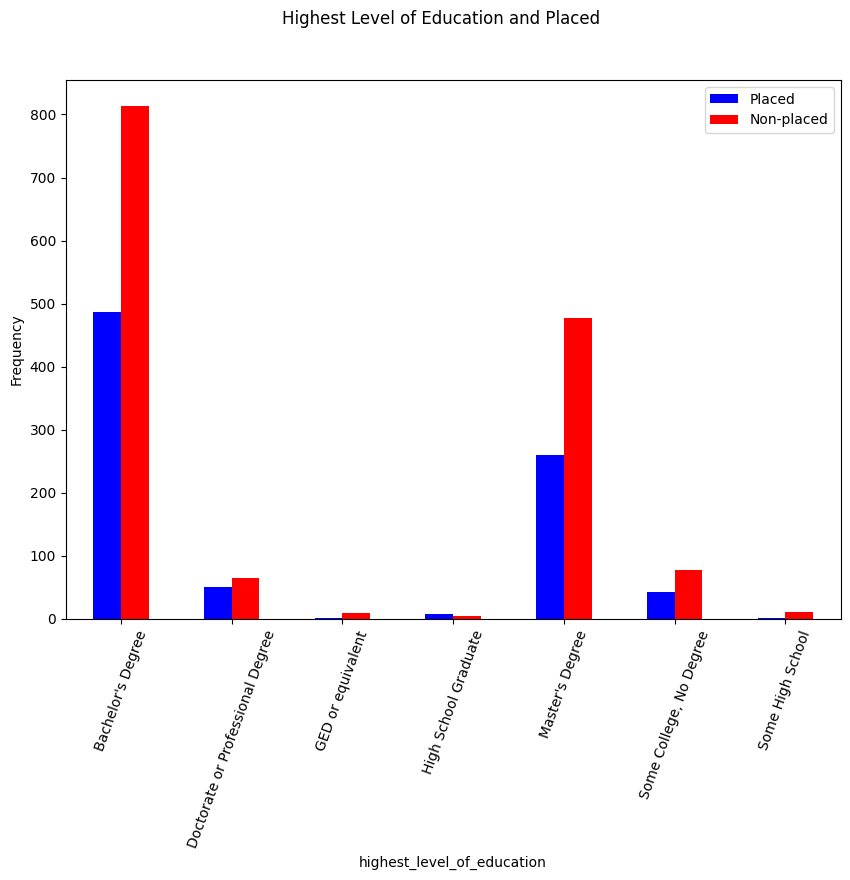

In [8]:
placed_fellows_edu = placed_fellows_df.groupby('highest_level_of_education').size()
non_placed_fellows_edu = non_placed_fellows_df.groupby('highest_level_of_education').size()

edu_vs_placed_df = pd.concat([placed_fellows_edu, non_placed_fellows_edu], axis = 1)
edu_vs_placed_df = edu_vs_placed_df.rename(columns = {
    0: 'Placed',
    1: 'Non-placed'
})

colors = ['blue', 'red']
fig, ax = plt.subplots(figsize = (10, 7))
fig.suptitle('Highest Level of Education and Placed')
plt.ylabel('Frequency')
create_placed_vs_var_df('highest_level_of_education').plot.bar(ax = ax, rot = 70, color=colors)
plt.show()

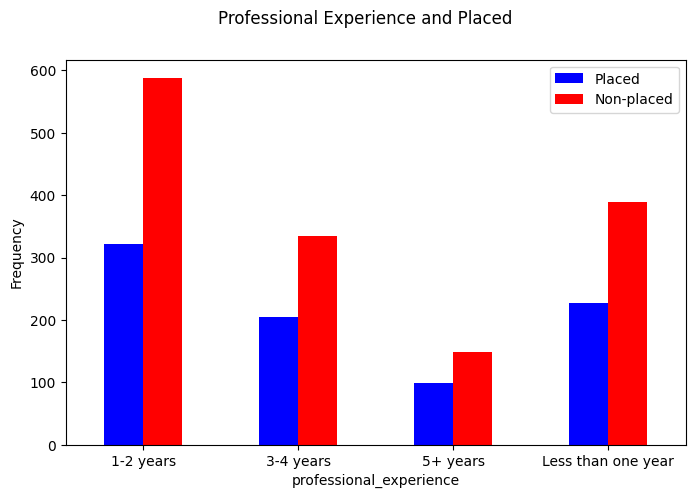

In [9]:
colors = ['blue', 'red']
fig, ax = plt.subplots(figsize = (8, 5))
fig.suptitle('Professional Experience and Placed')
plt.ylabel('Frequency')
create_placed_vs_var_df('professional_experience').plot.bar(ax = ax, rot = 0, color=colors )
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   pathrise_status              2311 non-null   object
 1   primary_track                2311 non-null   object
 2   program_duration_days        2311 non-null   int64 
 3   placed                       2311 non-null   int64 
 4   employment_status            2311 non-null   object
 5   highest_level_of_education   2311 non-null   object
 6   length_of_job_search         2311 non-null   object
 7   biggest_challenge_in_search  2311 non-null   object
 8   professional_experience      2311 non-null   object
 9   work_authorization_status    2311 non-null   object
 10  number_of_interviews         2311 non-null   int64 
 11  number_of_applications       2311 non-null   int64 
 12  gender                       2311 non-null   object
 13  race                         2311

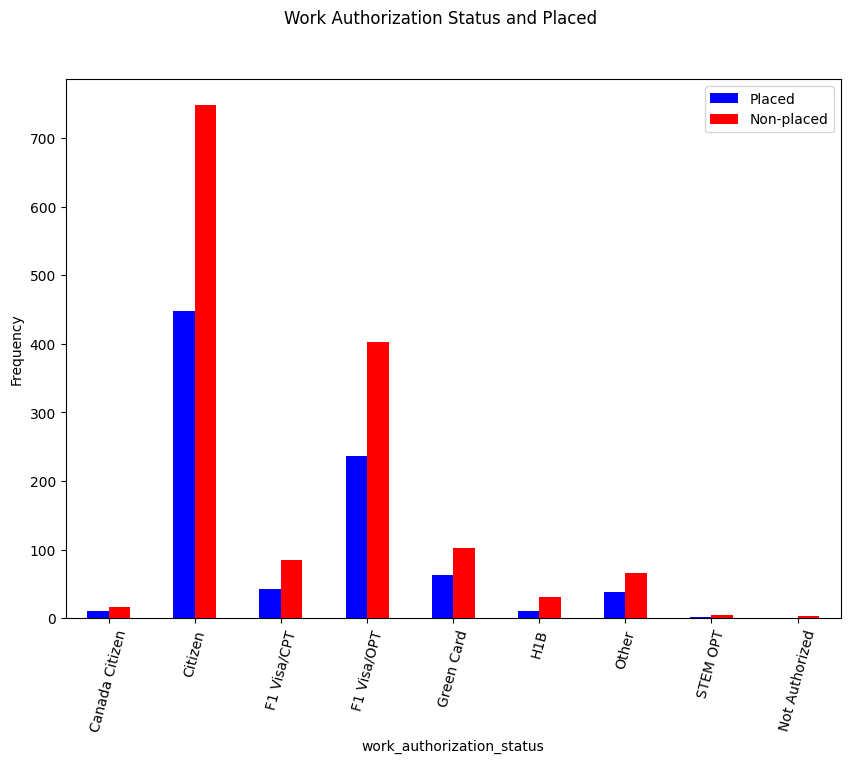

In [11]:
colors = ['blue', 'red']
fig, ax = plt.subplots(figsize = (10, 7))
fig.suptitle('Work Authorization Status and Placed')
plt.ylabel('Frequency')
create_placed_vs_var_df('work_authorization_status').plot.bar(ax = ax, rot = 75, color=colors )
plt.show()

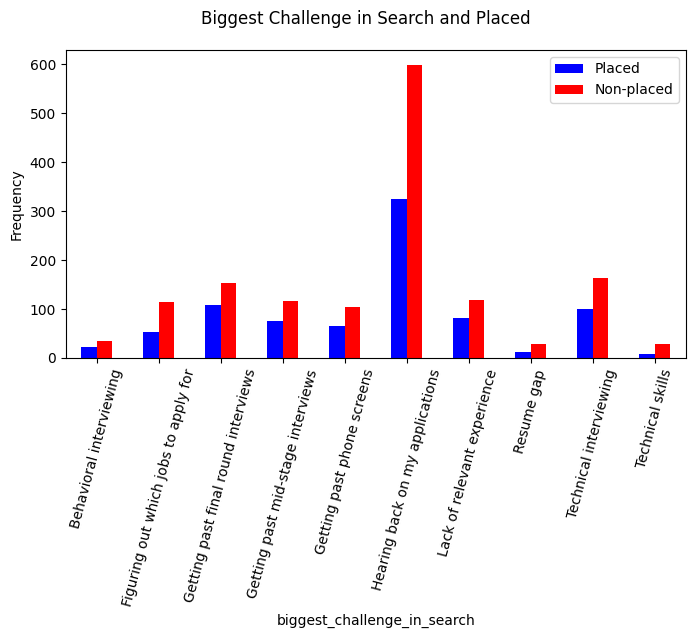

In [12]:
colors = ['blue', 'red']
fig, ax = plt.subplots(figsize = (8, 4))
fig.suptitle('Biggest Challenge in Search and Placed')
plt.ylabel('Frequency')
create_placed_vs_var_df('biggest_challenge_in_search').plot.bar(ax = ax, rot = 75, color=colors )
plt.show()

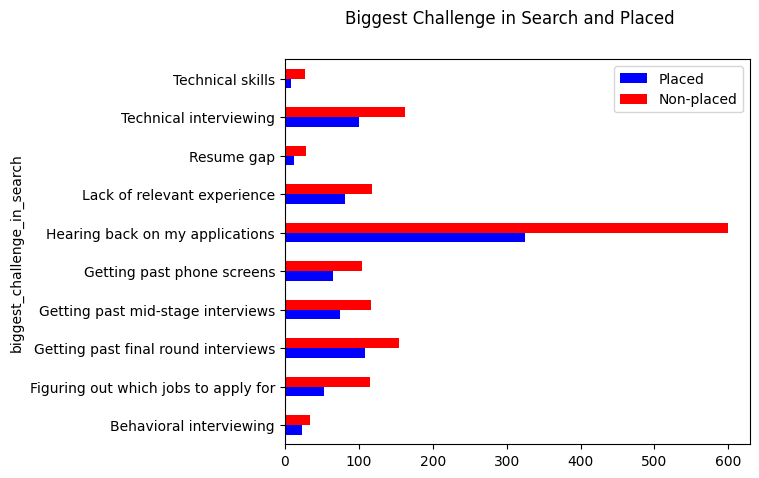

In [13]:
colors = ['blue', 'red']
fig, ax = plt.subplots(figsize=(6, 5))
fig.suptitle('Biggest Challenge in Search and Placed')
ax.set_xlabel('Frequency')
create_placed_vs_var_df('biggest_challenge_in_search').plot.barh(ax=ax, color=colors)  # Use plot.barh for horizontal bar plot
plt.show()

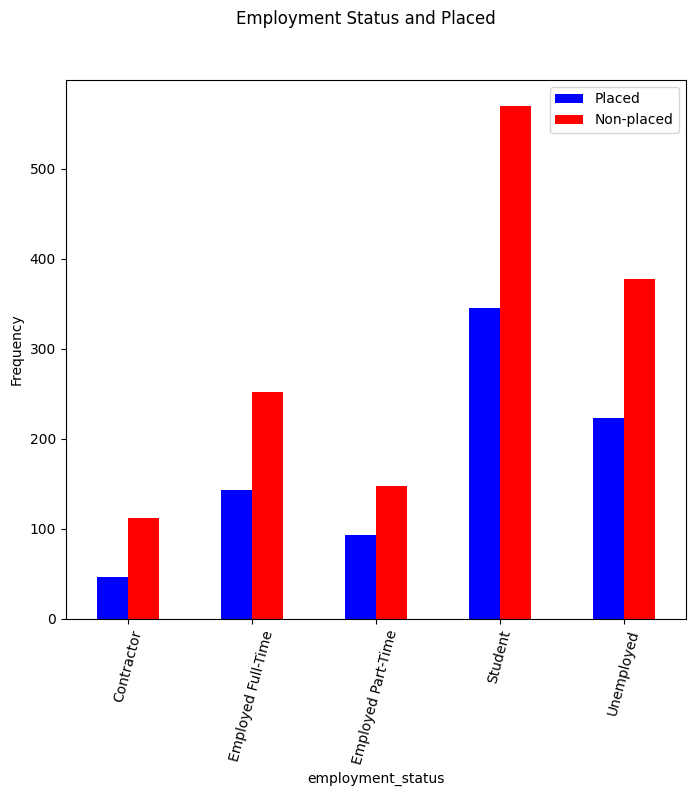

In [14]:
colors = ['blue', 'red']
fig, ax = plt.subplots(figsize = (8, 7))
fig.suptitle('Employment Status and Placed')
plt.ylabel('Frequency')
create_placed_vs_var_df('employment_status').plot.bar(ax = ax, rot = 75, color=colors )
plt.show()

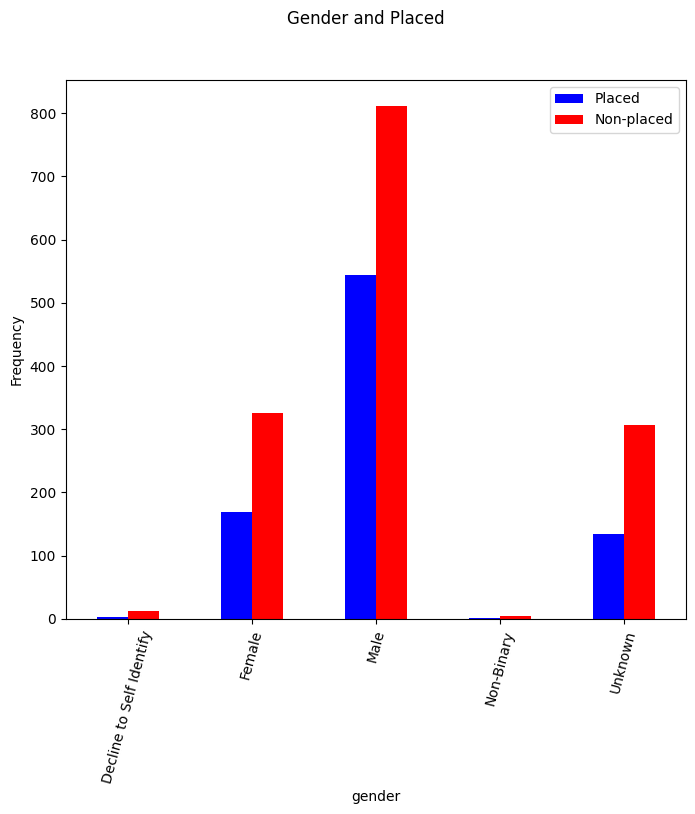

In [15]:
colors = ['blue', 'red']
fig, ax = plt.subplots(figsize = (8, 7))
fig.suptitle('Gender and Placed')
plt.ylabel('Frequency')
create_placed_vs_var_df('gender').plot.bar(ax = ax, rot = 75, color=colors )
plt.show()

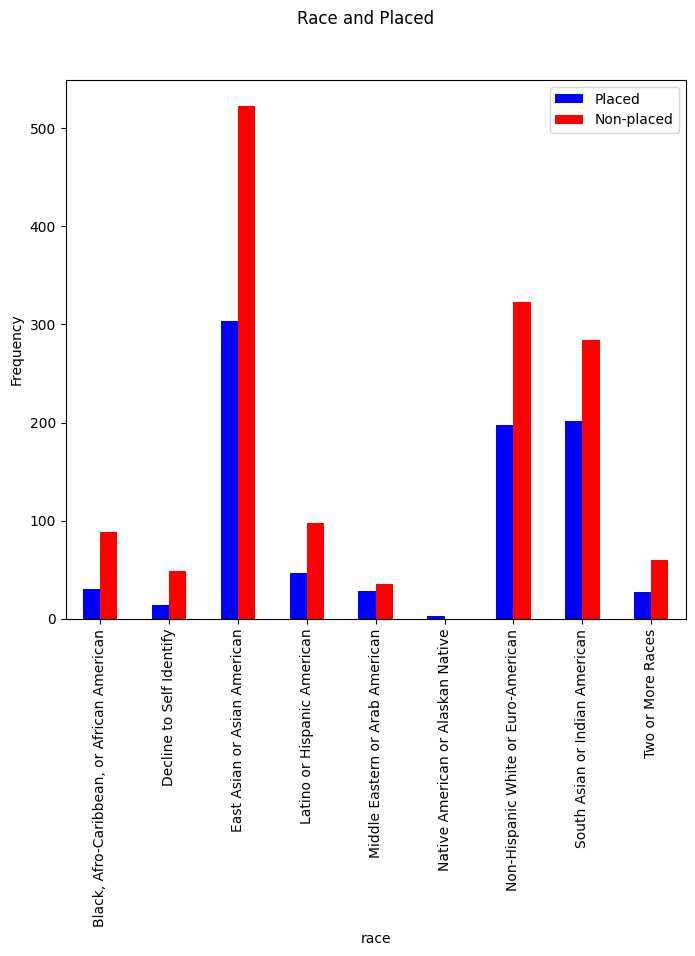

In [16]:
colors = ['blue', 'red']
fig, ax = plt.subplots(figsize = (8, 7))
fig.suptitle('Race and Placed')
plt.ylabel('Frequency')
create_placed_vs_var_df('race').plot.bar(ax = ax, rot = 90, color=colors )
plt.show()

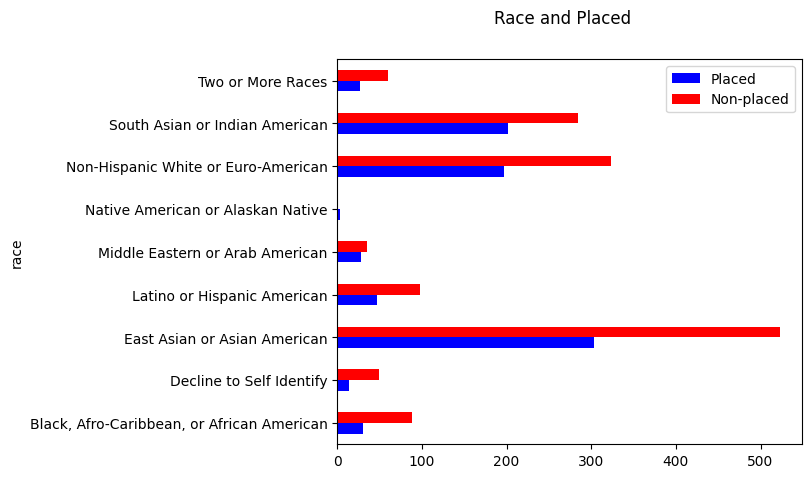

In [17]:
colors = ['blue', 'red']
fig, ax = plt.subplots(figsize=(6, 5))
fig.suptitle('Race and Placed')
ax.set_xlabel('Frequency')  # Update the x-axis label
create_placed_vs_var_df('race').plot.barh(ax=ax, color=colors)  # Use plot.barh for horizontal bar plot
plt.show()

/tmp/ipython-input-257161604.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(data=data, x='gender', palette=['blue', 'red'], orient='v')
/tmp/ipython-input-257161604.py:4: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax= sns.countplot(data=data, x='gender', palette=['blue', 'red'], orient='v')


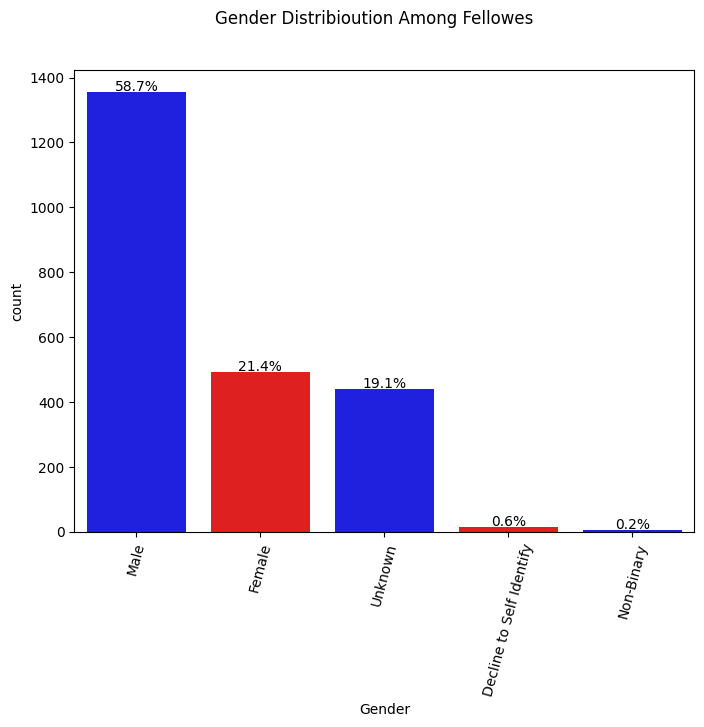

In [18]:
plt.figure(figsize=(8, 6))
plt.suptitle('Gender Distribioution Among Fellowes')
plt.xlabel('Gender')
ax= sns.countplot(data=data, x='gender', palette=['blue', 'red'], orient='v')
plt.xticks(rotation=75)

total = len(data["placed"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height/total:.1%}',
            ha="center")

In [19]:
pivot_table = pd.crosstab(data['placed'], data['gender'], margins=True, margins_name='Total', normalize='index') * 100

# Set index names for better readability
pivot_table.index = ['Not Placed Fellows %', 'Placed Fellows %', 'Total %']

# Styling the pivot table
styled_pivot = pivot_table.style.background_gradient(cmap='gray_r').format("{:.2f}")

# Display the styled pivot table
display(styled_pivot)

gender,Decline to Self Identify,Female,Male,Non-Binary,Unknown
Not Placed Fellows %,0.82,22.26,55.62,0.27,21.03
Placed Fellows %,0.35,19.86,63.92,0.12,15.75
Total %,0.65,21.38,58.68,0.22,19.08


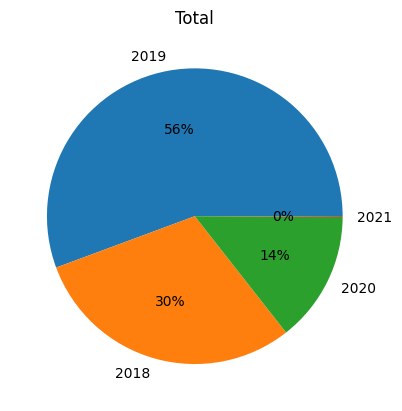

In [20]:
df_count=data['entrance_year'].value_counts()
df_count

count=list(df_count.values)
index=list(df_count.index)


plt.pie(count,labels=index, autopct='%.0f%%')
plt.title('Total')
plt.show()

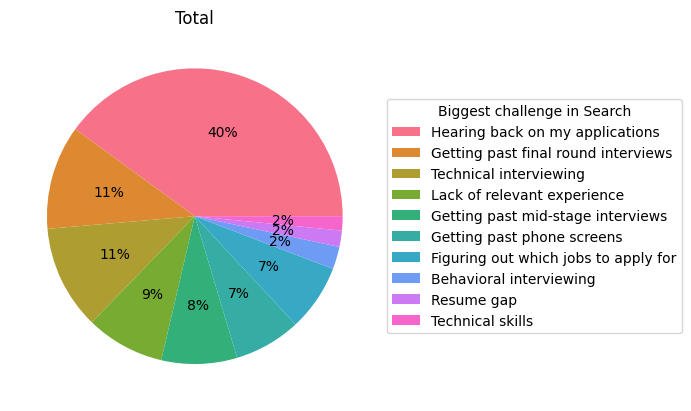

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your data preparation code
df_count = data['biggest_challenge_in_search'].value_counts()
count = list(df_count.values)
index = list(df_count.index)

# Using Seaborn color palette
colors = sns.color_palette("husl", len(index))

# Plotting the pie chart
plt.pie(count, labels=None, autopct='%.0f%%', colors=colors)
plt.title('Total')

# Adding a legend with titles
plt.legend(index, title='Biggest challenge in Search', loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

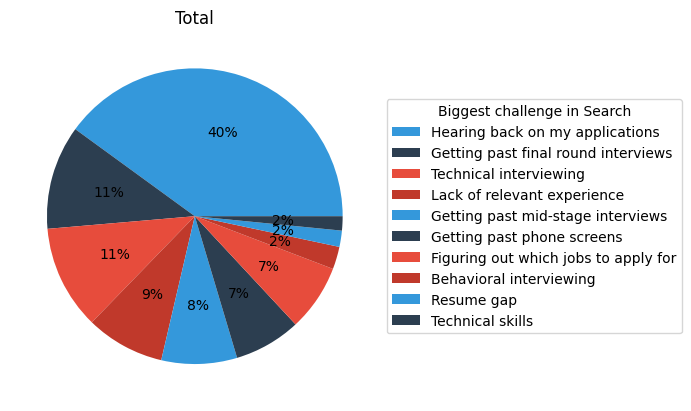

In [22]:

df_count = data['biggest_challenge_in_search'].value_counts()
count = list(df_count.values)
index = list(df_count.index)


custom_palette = {'blue': '#3498db', 'dark_blue': '#2c3e50', 'red': '#e74c3c', 'dark_red': '#c0392b'}

colors = [custom_palette[color] for color in custom_palette]



plt.pie(count, labels=None, autopct='%.0f%%', colors=colors)
plt.title('Total')


plt.legend(index, title='Biggest challenge in Search', loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()


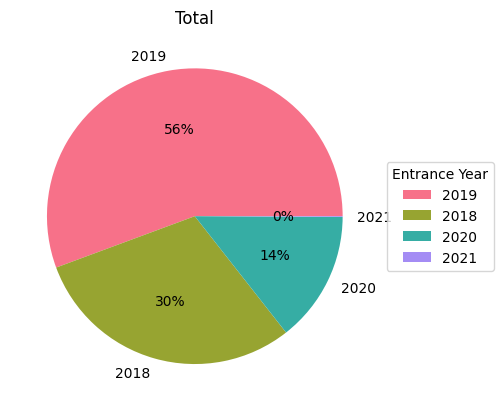

In [23]:
df_count = data['entrance_year'].value_counts()

count = list(df_count.values)
index = list(df_count.index)


colors = sns.color_palette("husl", len(index))

plt.pie(count, labels=index, autopct='%.0f%%', colors=colors)
plt.title('Total')
plt.legend(index, title='Entrance Year', loc='center left', bbox_to_anchor=(1, 0.5))  # Add a legend
plt.show()

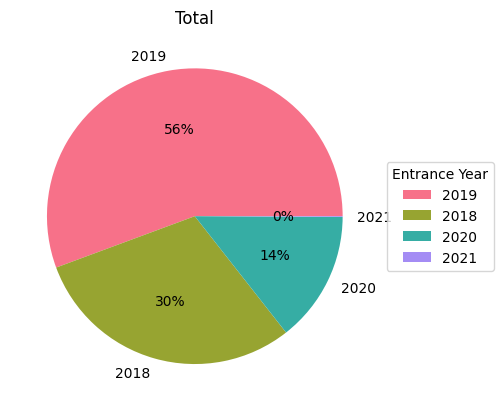

In [24]:
df_count = data['entrance_year'].value_counts()

count = list(df_count.values)
index = list(df_count.index)


colors = sns.color_palette("husl", len(index))

plt.pie(count, labels=index, autopct='%.0f%%', colors=colors)
plt.title('Total')
plt.legend(index, title='Entrance Year', loc='center left', bbox_to_anchor=(1, 0.5))  # Add a legend
plt.show()

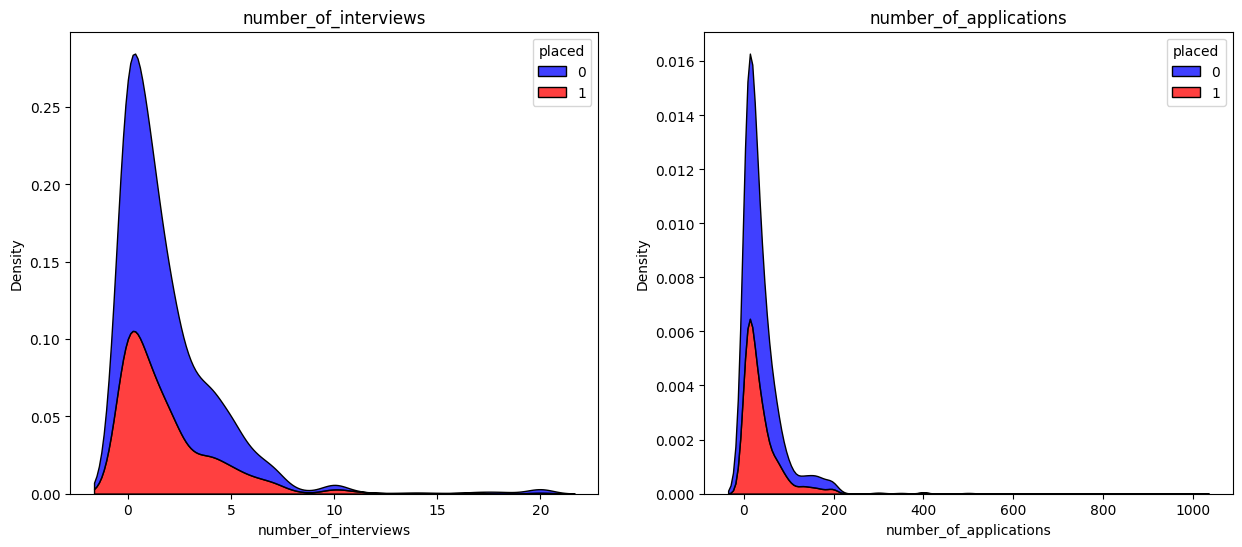

In [25]:
def overview_numerical_features(data, features, target):
    fig, axes = plt.subplots(len(features)//2 + (len(features)%2), 2, figsize=(15, ((len(features)//4)+1) * 6), dpi=100)
    i=0
    for feature in features:
        sns.kdeplot(data=data, x=feature, hue=target, multiple='stack', palette=['blue','red'], ax=axes.flatten()[i])
        axes.flatten()[i].set_title(feature)
        i += 1


    plt.show()
numerical_features=['number_of_interviews',
       'number_of_applications']
overview_numerical_features(data=data, features=numerical_features, target='placed')

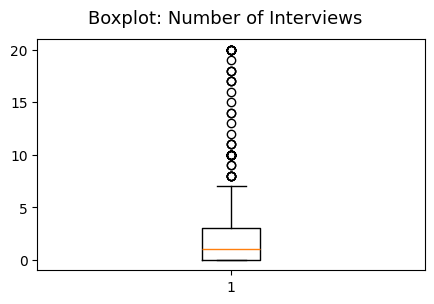

In [26]:
fig, ax = plt.subplots(figsize = (5, 3))
fig.suptitle('Boxplot: Number of Interviews', fontsize = 13)
plt.boxplot(data['number_of_interviews'])
plt.show()

/tmp/ipython-input-2710414654.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='placed', y='number_of_interviews',  palette=['blue','red'])


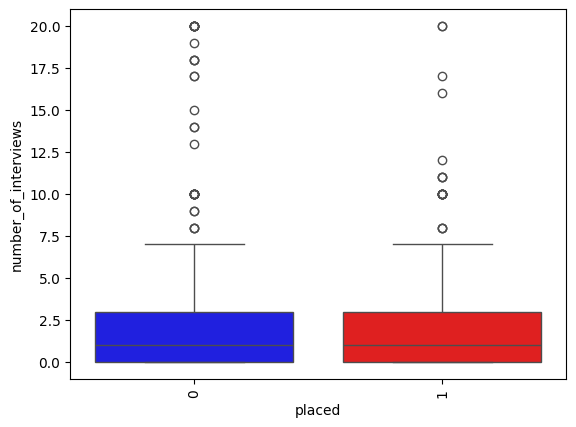

/tmp/ipython-input-2710414654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='placed', y='number_of_applications',  palette=['blue','red'])


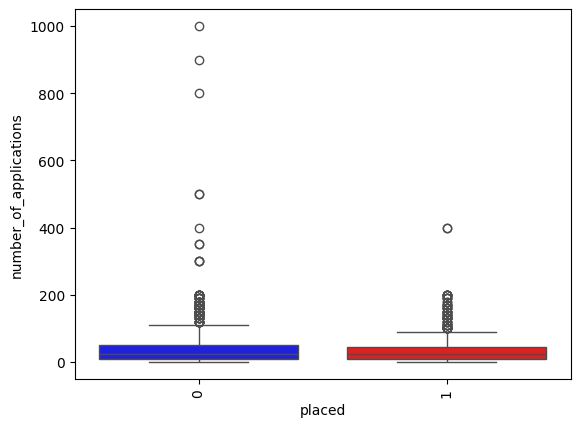

In [27]:

sns.boxplot(data=data, x='placed', y='number_of_interviews',  palette=['blue','red'])
plt.xticks(rotation=90)
plt.show()


sns.boxplot(data=data, x='placed', y='number_of_applications',  palette=['blue','red'])
plt.xticks(rotation=90)
plt.show()

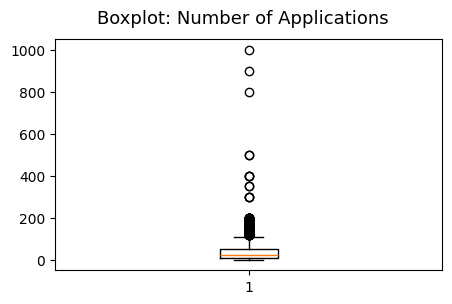

In [28]:
fig, ax = plt.subplots(figsize = (5, 3))
fig.suptitle('Boxplot: Number of Applications', fontsize = 13)
plt.boxplot(data['number_of_applications'])
plt.show()

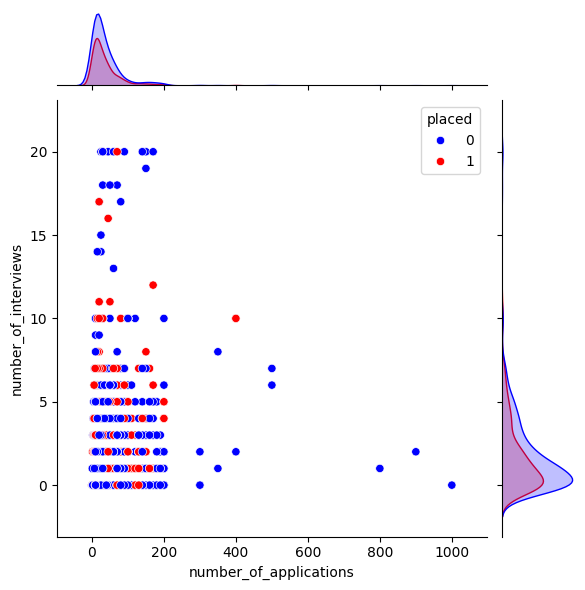

In [29]:
sns.jointplot(data=data, hue='placed', x='number_of_applications', y='number_of_interviews', palette=['blue','red'])

<Axes: xlabel='number_of_applications', ylabel='number_of_interviews'>

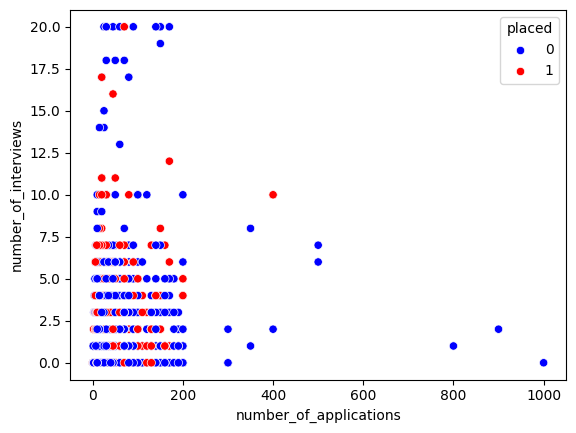

In [30]:
sns.scatterplot(x='number_of_applications',y='number_of_interviews',hue='placed',data=data, palette=['blue','red'])


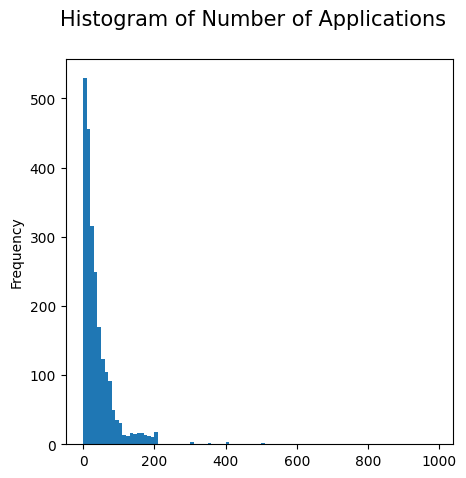

In [31]:
fig, ax = plt.subplots(figsize = (5, 5))
fig.suptitle('Histogram of Number of Applications', fontsize = 15)
plt.hist(data['number_of_applications'], bins = np.arange(0, 1000, 10))
plt.ylabel('Frequency')
plt.show()

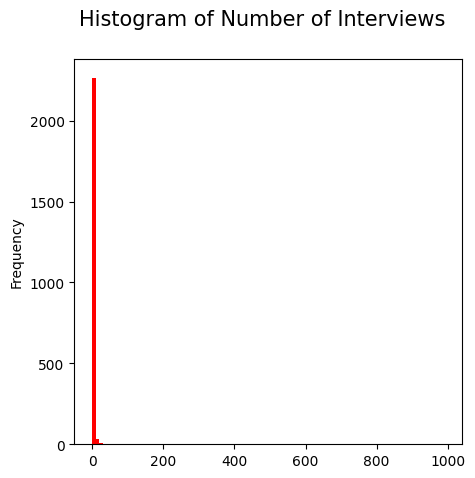

In [32]:
fig, ax = plt.subplots(figsize = (5, 5))
fig.suptitle('Histogram of Number of Interviews', fontsize = 15)
plt.hist(data['number_of_interviews'], bins = np.arange(0, 1000, 10), color= 'red')
plt.ylabel('Frequency')
plt.show()

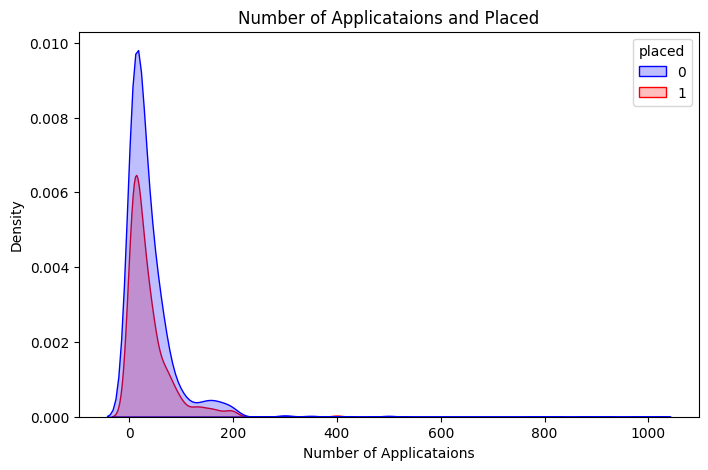

In [33]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='number_of_applications', hue='placed', palette=['blue','red'] ,fill=True)
plt.title('Number of Applicataions and Placed')
plt.xlabel('Number of Applicataions')
plt.ylabel('Density')
plt.show()


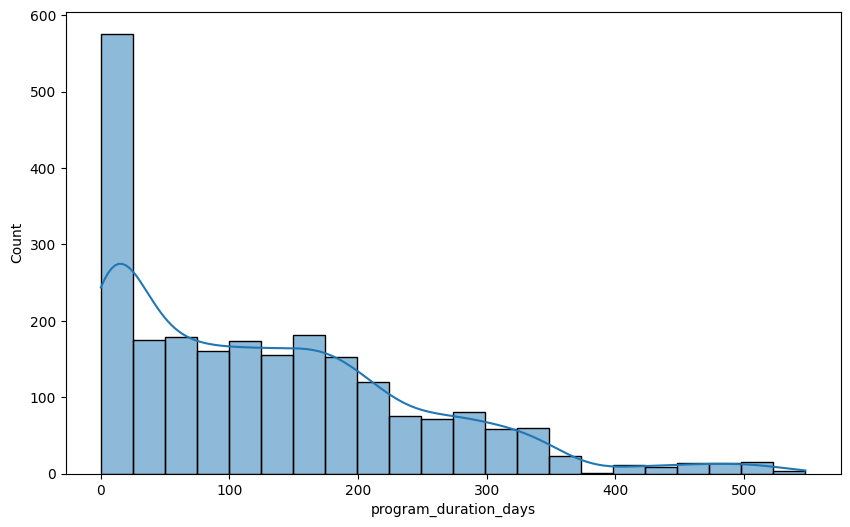

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='program_duration_days', kde=True)
plt.show()

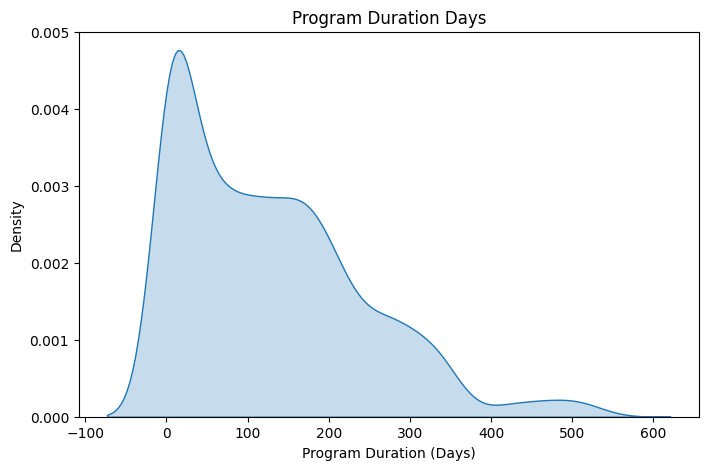

In [35]:

plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='program_duration_days', fill=True)
plt.title('Program Duration Days')
plt.xlabel('Program Duration (Days)')
plt.ylabel('Density')
plt.show()

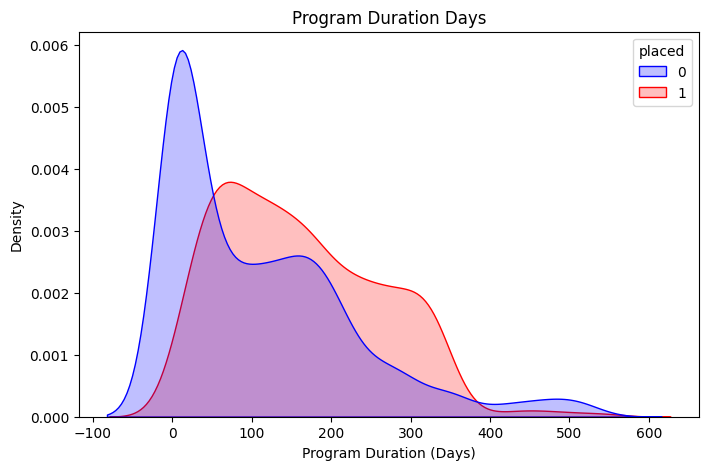

In [36]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='program_duration_days', fill=True, hue='placed',palette=['blue','red'], common_norm=False)
plt.title('Program Duration Days')
plt.xlabel('Program Duration (Days)')
plt.ylabel('Density')
plt.show()

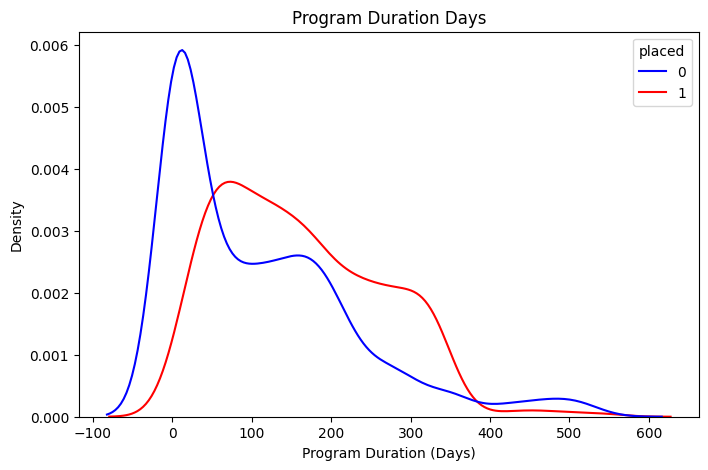

In [37]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='program_duration_days', fill=False, hue='placed', palette=['blue', 'red'], common_norm=False)
plt.title('Program Duration Days')
plt.xlabel('Program Duration (Days)')
plt.ylabel('Density')
plt.show()

/tmp/ipython-input-433824266.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='placed', y='program_duration_days',  palette=['blue','red'])


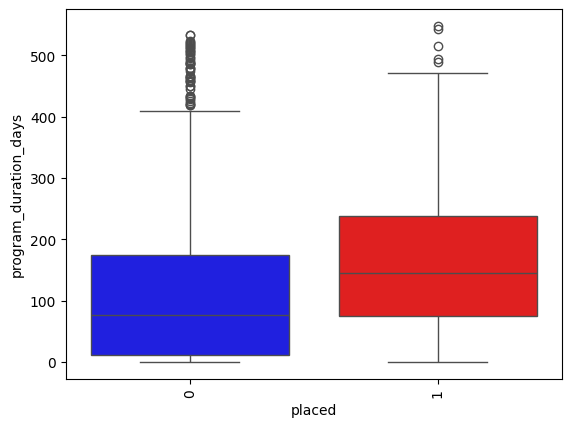

In [38]:
sns.boxplot(data=data, x='placed', y='program_duration_days',  palette=['blue','red'])
plt.xticks(rotation=90)
plt.show()




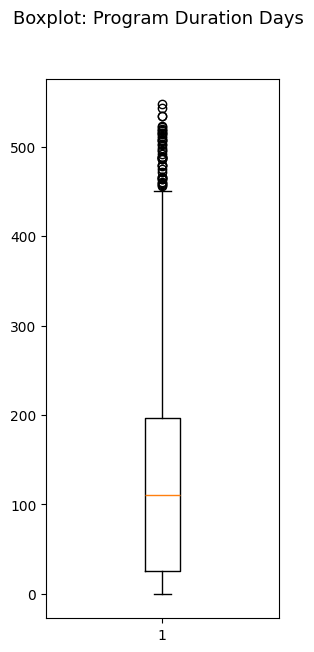

In [39]:
fig, ax = plt.subplots(figsize = (3, 7))
fig.suptitle('Boxplot: Program Duration Days', fontsize = 13)
plt.boxplot(data['program_duration_days'])
plt.show()

In [40]:
pivot_table = pd.crosstab(data['placed'], data['gender'], margins=True, margins_name='Total', normalize='index') * 100

# Set index names for better readability
pivot_table.index = ['Not Placed Fellows %', 'Placed Fellows %', 'Total %']

# Styling the pivot table
styled_pivot = pivot_table.style.background_gradient(cmap='gray_r').format("{:.2f}")

# Display the styled pivot table
display(styled_pivot)



gender,Decline to Self Identify,Female,Male,Non-Binary,Unknown
Not Placed Fellows %,0.82,22.26,55.62,0.27,21.03
Placed Fellows %,0.35,19.86,63.92,0.12,15.75
Total %,0.65,21.38,58.68,0.22,19.08


gender,Decline to Self Identify,Female,Male,Non-Binary,Unknown
Not Placed Fellows %,0.82,22.26,55.62,0.27,21.03
Placed Fellows %,0.35,19.86,63.92,0.12,15.75
Total %,0.65,21.38,58.68,0.22,19.08


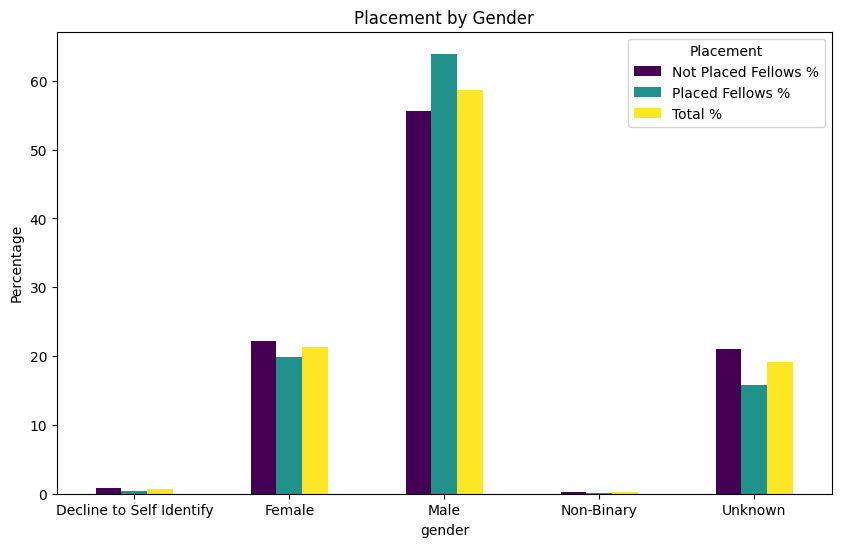

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code for creating the pivot table
pivot_table = pd.crosstab(data['placed'], data['gender'], margins=True, margins_name='Total', normalize='index') * 100
pivot_table.index = ['Not Placed Fellows %', 'Placed Fellows %', 'Total %']
styled_pivot = pivot_table.style.background_gradient(cmap='gray_r').format("{:.2f}")
display(styled_pivot)

# Create a bar plot
ax = pivot_table.T.plot.bar(rot=0, colormap='viridis', figsize=(10, 6))
ax.set_ylabel('Percentage')
ax.set_title('Placement by Gender')
ax.legend(title='Placement')

# Display the plot
plt.show()

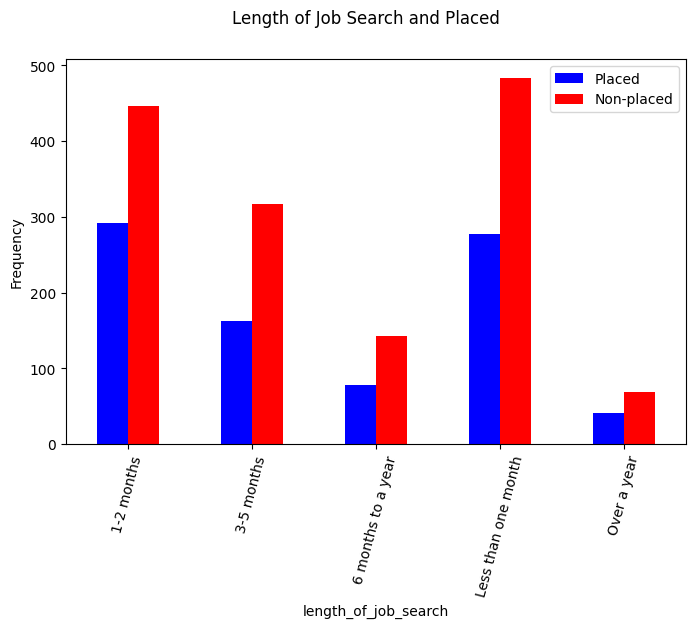

In [42]:
colors = ['blue', 'red']
fig, ax = plt.subplots(figsize = (8, 5))
fig.suptitle('Length of Job Search and Placed')
plt.ylabel('Frequency')
create_placed_vs_var_df('length_of_job_search').plot.bar(ax = ax, rot = 75, color=colors )
plt.show()

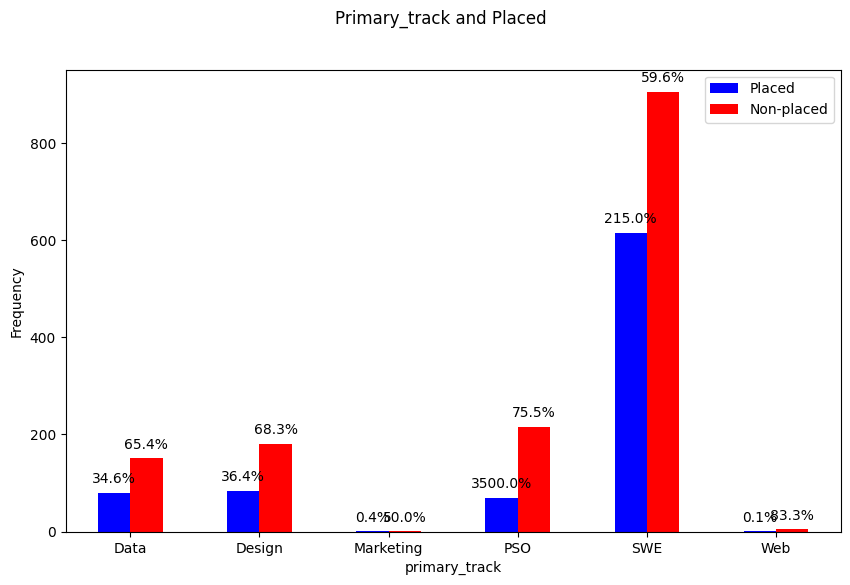

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

placed_fellows_df = data[data['placed'] == 1]
non_placed_fellows_df = data[data['placed'] == 0]

def create_placed_vs_var_df(feature):
    placed_fellows = placed_fellows_df.groupby(feature).size()
    non_placed_fellows = non_placed_fellows_df.groupby(feature).size()

    feature_vs_placed_df = pd.concat([placed_fellows, non_placed_fellows], axis=1)
    feature_vs_placed_df = feature_vs_placed_df.rename(columns={
        0: 'Placed',
        1: 'Non-placed'
    })
    return feature_vs_placed_df

def plot_with_percentage(df, feature):
    colors = ['blue', 'red']
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(f'{feature.capitalize()} and Placed')
    plt.ylabel('Frequency')

    ax = df.plot.bar(ax=ax, rot=0, color=colors)

    # Annotate each bar with percentage
    for p in ax.patches:
        index_value = df.index[int(p.get_x())]
        percentage = '{:.1f}%'.format(p.get_height() / df.sum(axis=1).loc[index_value] * 100)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

# Example usage
feature_vs_placed_df = create_placed_vs_var_df('primary_track')
plot_with_percentage(feature_vs_placed_df, 'primary_track')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   pathrise_status              2311 non-null   object
 1   primary_track                2311 non-null   object
 2   program_duration_days        2311 non-null   int64 
 3   placed                       2311 non-null   int64 
 4   employment_status            2311 non-null   object
 5   highest_level_of_education   2311 non-null   object
 6   length_of_job_search         2311 non-null   object
 7   biggest_challenge_in_search  2311 non-null   object
 8   professional_experience      2311 non-null   object
 9   work_authorization_status    2311 non-null   object
 10  number_of_interviews         2311 non-null   int64 
 11  number_of_applications       2311 non-null   int64 
 12  gender                       2311 non-null   object
 13  race                         2311

/tmp/ipython-input-648358688.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='highest_level_of_education',y='primary_track',data=data, palette=['blue','red'])


<Axes: xlabel='highest_level_of_education', ylabel='primary_track'>

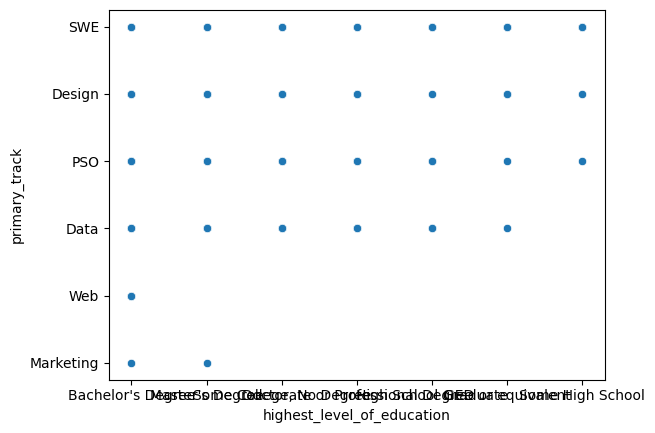

In [45]:
sns.scatterplot(x='highest_level_of_education',y='primary_track',data=data, palette=['blue','red'])


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 97.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 96.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.7% of the points cannot be place

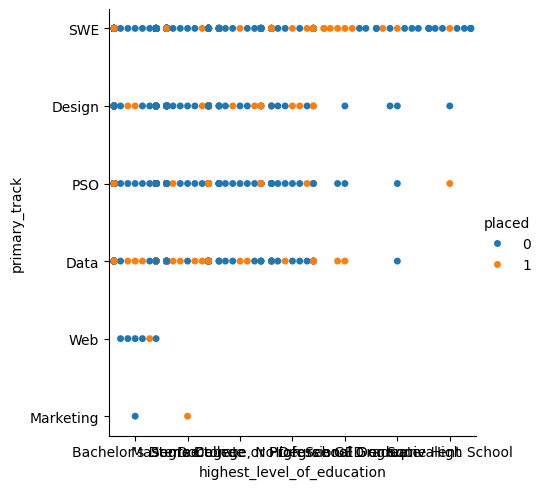

In [46]:
sns.catplot(x='highest_level_of_education', y='primary_track', hue='placed', kind='swarm', data=data)

plt.show()

/tmp/ipython-input-4015941077.py:8: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='highest_level_of_education', data=data, hue='primary_track', palette=colors)


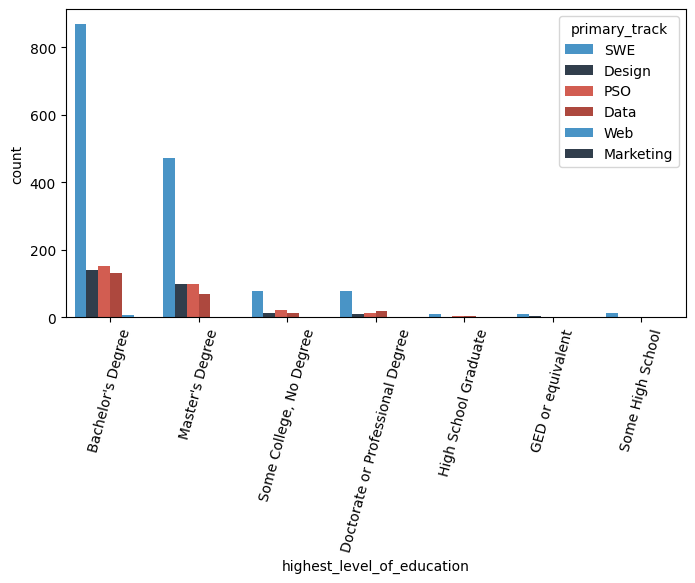

In [47]:
plt.figure(figsize=(8, 4))
custom_palette = {'blue': '#3498db', 'dark_blue': '#2c3e50', 'red': '#e74c3c', 'dark_red': '#c0392b'}

# Extract colors from the custom_palette dictionary and create a list
colors = [custom_palette[color] for color in custom_palette]

# Use the list of colors as the palette parameter
sns.countplot(x='highest_level_of_education', data=data, hue='primary_track', palette=colors)
plt.xticks(rotation=75)
plt.show()

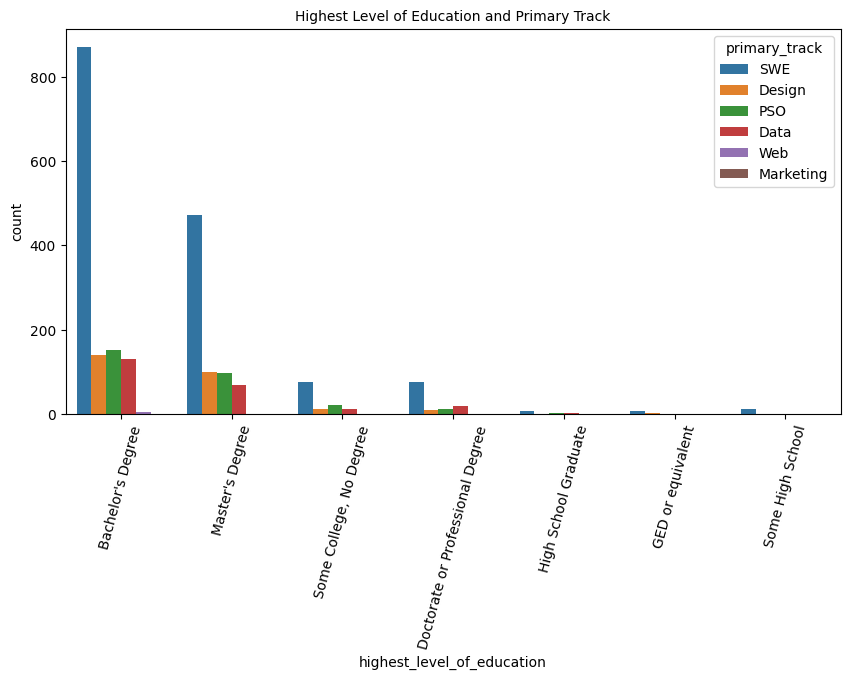

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x='highest_level_of_education', data=data, hue='primary_track')
plt.xticks(rotation=75)
plt.title('Highest Level of Education and Primary Track', fontsize=10)
plt.show()

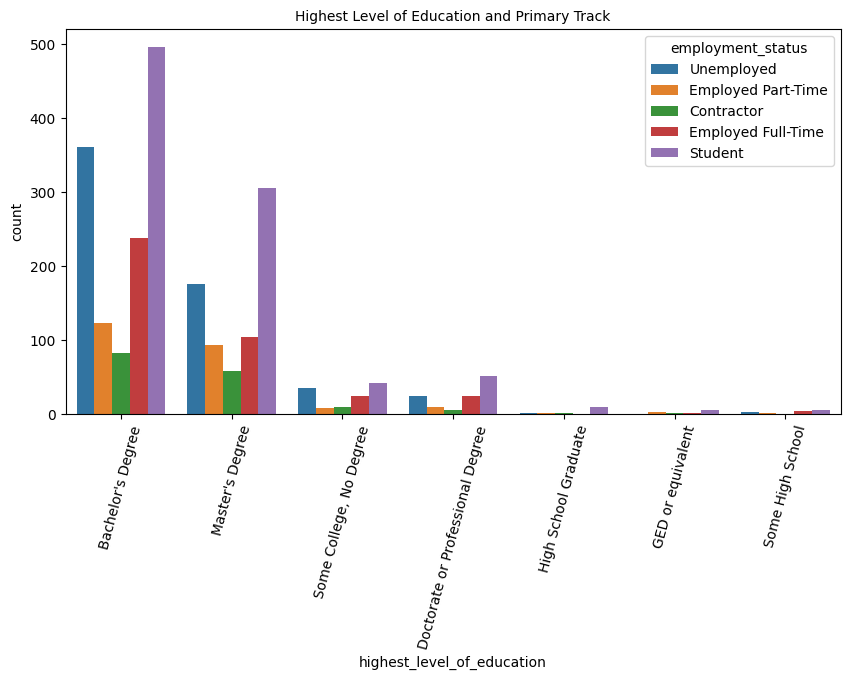

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x='highest_level_of_education', data=data, hue='employment_status')
plt.xticks(rotation=75)
plt.title('Highest Level of Education and Primary Track', fontsize=10)
plt.show()

/tmp/ipython-input-72566366.py:8: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='highest_level_of_education', data=data, hue='employment_status', palette=colors)


<Figure size 900x400 with 0 Axes>

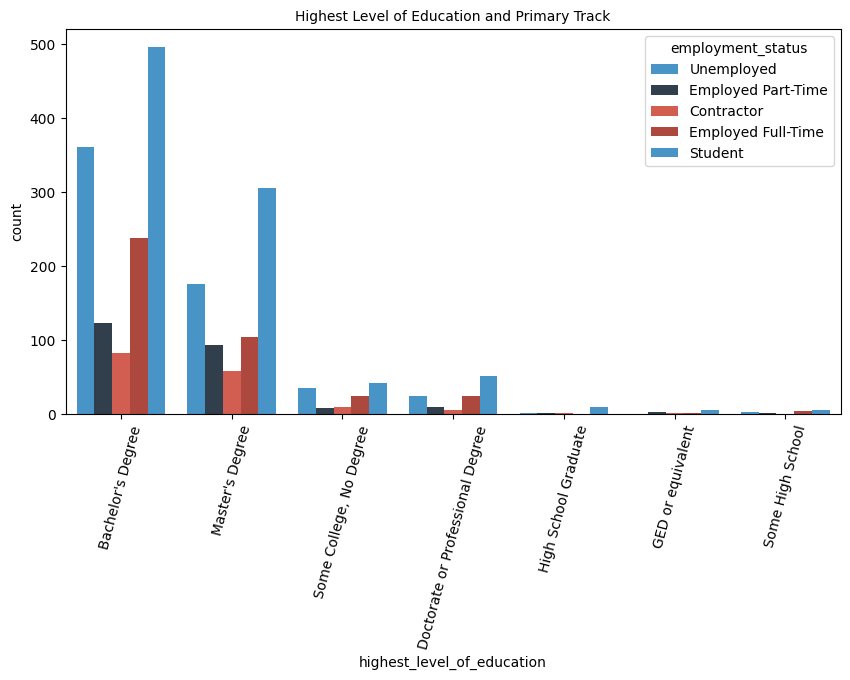

In [50]:
plt.figure(figsize=(9, 4))
custom_palette = {'blue': '#3498db', 'dark_blue': '#2c3e50', 'red': '#e74c3c', 'dark_red': '#c0392b'}

# Extract colors from the custom_palette dictionary and create a list
colors = [custom_palette[color] for color in custom_palette]

plt.figure(figsize=(10,5))
sns.countplot(x='highest_level_of_education', data=data, hue='employment_status', palette=colors)
plt.xticks(rotation=75)
plt.title('Highest Level of Education and Primary Track', fontsize=10)
plt.show()



# **Project Summary**
This project analyzed the provided dataset to identify potential relationships between various individual characteristics and their job placement success. Through visualizations and exploratory data analysis, we examined how factors such as education level, primary track, employment status, demographics, and job search activity correlate with placement outcomes. The findings from this analysis can be used to better understand the fellow population and potentially identify areas for program improvement to enhance placement rates.